1. [Association Rule Generation from Transaction Data]
(a) Download transaction dataset to your local drive.
i. Go to the following Google Drive link (Students must be logged in to their Rowan ac-
counts):
https://drive.google.com/drive/folders/1LuFEbgq3IvisEXT1jOZ-H4jWeqzqEH3m?
usp=sharing
(b) Download the ’Grocery Items {DATASET NUMBER}.csv’ file from the Google Drive Link.
DATASET NUMBER is the number assigned to you earlier in the semester
(c) • How many unique items are there in your dataset?
• How many records are there in your dataset?
• What is the most popular item in your dataset? How many transactions contain this item? (1 point)

In [1]:
import pandas as pd

# Load the dataset
file_path = r'Grocery_Items_11.csv'
data = pd.read_csv(file_path)

# Flatten the dataset and count unique items and their occurrences
all_items = [item for sublist in data.values for item in sublist if pd.notnull(item)]

# Create a pandas Series to analyze item frequencies
item_series = pd.Series(all_items)
item_counts = item_series.value_counts()

# Extract key results
unique_item_count = item_counts.size
total_transactions = len(data)
most_popular_item = item_counts.idxmax()
most_popular_count = item_counts.max()

# Display results
print(f"Unique Items Count: {unique_item_count}")
print(f"Total Transactions: {total_transactions}")
print(f"Most Popular Item: {most_popular_item}")
print(f"Occurrences of '{most_popular_item}': {most_popular_count}")

Unique Items Count: 165
Total Transactions: 8000
Most Popular Item: whole milk
Occurrences of 'whole milk': 1392


(d) Using minimum support = 0.01 and minimum confidence threshold = 0.08, what are the association
rules you can extract from your dataset? (0.5 point)
(see http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_
rules/)

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

transactions = data.applymap(str).fillna("").values.tolist()
cleaned_transactions = [[item for item in transaction if item] for transaction in transactions]

encoder = TransactionEncoder()
encoded_data = encoder.fit_transform(cleaned_transactions)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.columns_)

if "" in encoded_df.columns:
    encoded_df.drop(columns=[""], inplace=True)

min_support_threshold = 0.01
frequent_itemsets = apriori(encoded_df, min_support=min_support_threshold, use_colnames=True)

if 'support' not in frequent_itemsets.columns:
    raise ValueError("The 'frequent_itemsets' DataFrame must include a 'support' column.")

min_confidence_threshold = 0.08
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)

print(rules)


             antecedents        consequents  antecedent support  \
0             (UHT-milk)              (nan)            0.021125   
1                 (beef)              (nan)            0.035250   
2              (berries)              (nan)            0.020000   
3            (beverages)              (nan)            0.016125   
4         (bottled beer)              (nan)            0.045875   
..                   ...                ...                 ...   
91    (whole milk, soda)              (nan)            0.011500   
92                (soda)  (nan, whole milk)            0.097875   
93         (nan, yogurt)       (whole milk)            0.085750   
94  (whole milk, yogurt)              (nan)            0.011000   
95              (yogurt)  (nan, whole milk)            0.085875   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.999875  0.021125    1.000000  1.000125  0.000003         inf  
1             0.999875  0.035250    1

/var/folders/2t/y8j6qkxj7hz7_q5nwn5zny0m0000gq/T/ipykernel_25202/2433047633.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = data.applymap(str).fillna("").values.tolist()


(e) Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct):
0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from
the dataset. Construct a heatmap using Seaborn data visualization library (https://seaborn.
pydata.org/generated/seaborn.heatmap.html) to show the count results such that the x-
axis is msv and the y-axis is mct. (1.5 points)

/var/folders/2t/y8j6qkxj7hz7_q5nwn5zny0m0000gq/T/ipykernel_25202/691566377.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaned_transactions = data.fillna("").applymap(str).values.tolist()


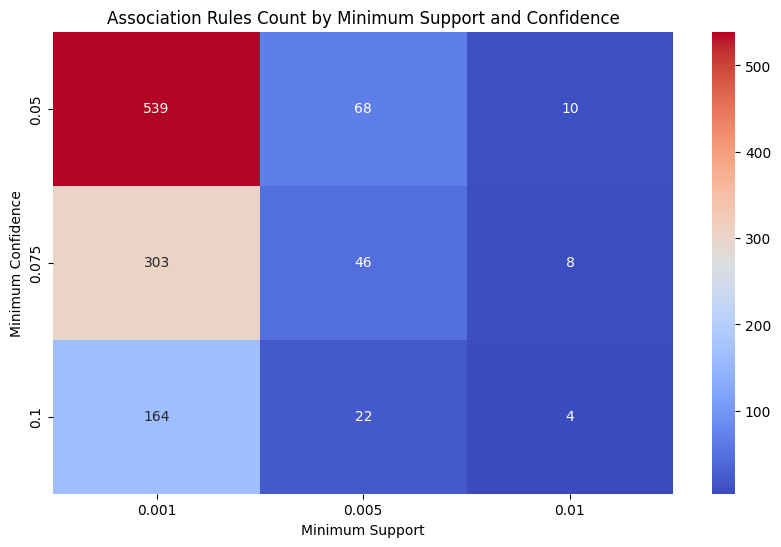

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_transactions = data.fillna("").applymap(str).values.tolist()
filtered_transactions = [[item for item in transaction if item] for transaction in cleaned_transactions]

encoder = TransactionEncoder()
encoded_array = encoder.fit_transform(filtered_transactions)
encoded_df = pd.DataFrame(encoded_array, columns=encoder.columns_)

if "" in encoded_df.columns:
    encoded_df.drop(columns=[""], inplace=True)

min_support_values = [0.001, 0.005, 0.01]
min_confidence_values = [0.05, 0.075, 0.1]

results = []
for min_support in min_support_values:
    itemsets = apriori(encoded_df, min_support=min_support, use_colnames=True)
    for min_confidence in min_confidence_values:
        rules = association_rules(itemsets, metric="confidence", min_threshold=min_confidence)
        results.append({"min_support": min_support, "min_confidence": min_confidence, "rules_count": len(rules)})

results_df = pd.DataFrame(results)
heatmap_data = results_df.pivot(index="min_confidence", columns="min_support", values="rules_count")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt="d")
plt.title("Association Rules Count by Minimum Support and Confidence")
plt.xlabel("Minimum Support")
plt.ylabel("Minimum Confidence")
plt.show()

2. [Image Classification using CNN] Construct a 4-class classification model using a convolutional neural
network with the following simple architecture 

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Assuming the dataset is already preprocessed and loaded into the training and validation datasets

# Set up data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    'Images',
    target_size=(128, 128),  # Resize images to 128x128 (or whatever size fits your model)
    batch_size=32,
    class_mode='categorical',  # since it's a multi-class classification
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'Images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Build the CNN model
model = models.Sequential()

# First Convolutional Layer with 8 filters, 3x3 kernel
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer with 4 filters, 3x3 kernel
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the Tensor
model.add(layers.Flatten())

# Fully connected hidden layer with 8 nodes
model.add(layers.Dense(8, activation='relu'))

# Output layer with 4 nodes (since there are 4 classes), using softmax activation
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    batch_size=32  # You can adjust the batch size if needed
)

# Save the trained model
model.save('dog_breed_classifier.h5')


Found 492 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.2555 - loss: 1.3650 - val_accuracy: 0.2975 - val_loss: 1.3518
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.3666 - loss: 1.3018 - val_accuracy: 0.3884 - val_loss: 1.3196
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.4222 - loss: 1.2464 - val_accuracy: 0.3471 - val_loss: 1.2876
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4041 - loss: 1.1973 - val_accuracy: 0.4876 - val_loss: 1.2553
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5330 - loss: 1.1299 - val_accuracy: 0.4876 - val_loss: 1.2492
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6007 - loss: 1.0893 - val_accuracy: 0.4876 - val_loss: 1.2551
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6629 - loss: 1.0491 - val_accuracy: 0.5041 - val_loss: 1.2309
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7015 - loss: 1.0007 - val_accuracy: 0.4959 - v

Plot a graph to show the learning curves (i.e., x-axis: number of epochs; y-axis: training and
validation accuracy - 2 curves) (1 points)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9050 - loss: 0.5375 - val_accuracy: 0.5455 - val_loss: 1.4107
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9202 - loss: 0.4965 - val_accuracy: 0.5289 - val_loss: 1.4738
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9199 - loss: 0.4580 - val_accuracy: 0.5537 - val_loss: 1.4640
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9135 - loss: 0.4758 - val_accuracy: 0.5041 - val_loss: 1.5168
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9519 - loss: 0.3944 - val_accuracy: 0.5289 - val_loss: 1.5013
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9350 - loss: 0.4007 - val_accuracy: 0.5620 - val_loss: 1.4698
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9717 - loss: 0.3529 - val_accuracy: 0.5207 - val_loss: 1.5707
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9672 - loss: 0.3684 - val_accuracy: 0.4959 - v

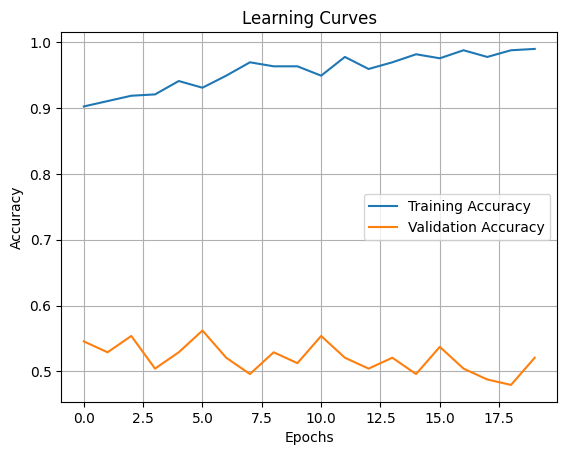

In [5]:
import matplotlib.pyplot as plt

# Train the model and capture the training history
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    batch_size=32
)

# Plot the learning curves for training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Perform ONE of the following experiment below ((a), (b) or (c)) based on the last digit of your
Rowan Banner ID (1 point):
(a) Train the CNN using 2 other filter sizes: 5 × 5 and 7 × 7 for the 2nd convolution layer (i) with
all other parameters unchanged
(b) Train the CNN using 2 other number of filters: 8 and 16 for the 2nd convolution layer (i) with
all other parameters unchanged
(c) Train the CNN using 2 other number of nodes in the hidden layer (iv): 4 and 16 with all other
parameters unchanged
If the last digit is {0, 1, 2, 3}, do (a). If the last digit is {4, 5, 6}, do (b). If the last digit is {7, 8, 9},
do (c). State your Rowan Banner ID in your submission so that we know which experiment you
are doing

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.2783 - loss: 1.3861 - val_accuracy: 0.3140 - val_loss: 1.3651
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3172 - loss: 1.3414 - val_accuracy: 0.3471 - val_loss: 1.3497
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.3725 - loss: 1.3126 - val_accuracy: 0.3388 - val_loss: 1.3434
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.3708 - loss: 1.2844 - val_accuracy: 0.2975 - val_loss: 1.3853
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.3911 - loss: 1.2705 - val_accuracy: 0.3884 - val_loss: 1.3290
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.4271 - loss: 1.2361 - val_accuracy: 0.3719 - val_loss: 1.3312
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.4582 - loss: 1.2043 - val_accuracy: 0.4132 - val_loss: 1.3036
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4604 - loss: 1.2033 - val_accuracy: 0.4463 - v

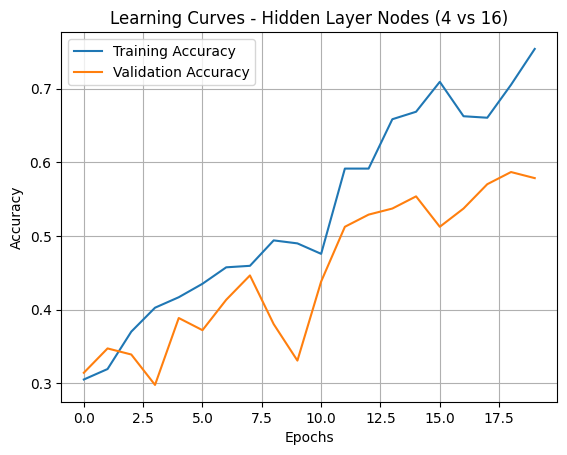

In [6]:
# Experiment (c) - Train with 4 and 16 nodes in the hidden layer

# Create the CNN model
model = models.Sequential()

# First Convolutional Layer with 8 filters, 3x3 kernel
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer with 4 filters, 3x3 kernel
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the Tensor
model.add(layers.Flatten())

# Change hidden layer nodes (test 4 and 16 nodes)
model.add(layers.Dense(4, activation='relu'))  # First hidden layer with 4 nodes
#model.add(layers.Dense(16, activation='relu'))  # Uncomment this for testing 16 nodes instead

# Output layer with 4 nodes (since there are 4 classes), using softmax activation
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    batch_size=32
)

# Plot the learning curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves - Hidden Layer Nodes (4 vs 16)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Plot the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy -
2 curves) for the classification models using the above 2 different parameter values (1 points)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.2793 - loss: 1.3804 - val_accuracy: 0.3140 - val_loss: 1.3700
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3367 - loss: 1.3492 - val_accuracy: 0.3306 - val_loss: 1.3780
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.3327 - loss: 1.3631 - val_accuracy: 0.3140 - val_loss: 1.3631
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.3577 - loss: 1.3368 - val_accuracy: 0.3223 - val_loss: 1.3874
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.3364 - loss: 1.3239 - val_accuracy: 0.3306 - val_loss: 1.3434
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.3667 - loss: 1.2904 - val_accuracy: 0.3388 - val_loss: 1.3484
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.3941 - loss: 1.2681 - val_accuracy: 0.3306 - val_loss: 1.3218
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.4105 - loss: 1.2440 - val_accuracy: 0.3554 - 

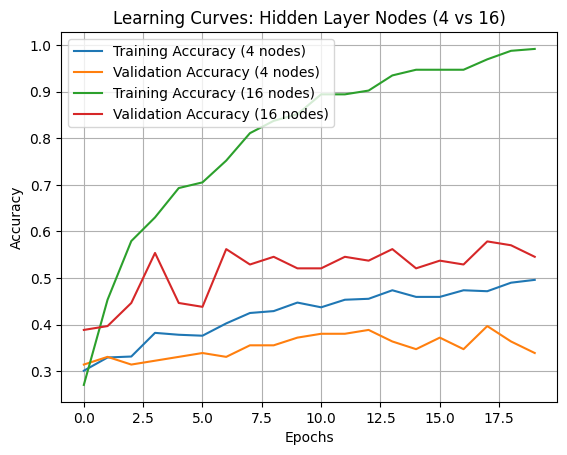

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# First model: Hidden layer with 4 nodes
model_4_nodes = models.Sequential()

# First Convolutional Layer with 8 filters, 3x3 kernel
model_4_nodes.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_4_nodes.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer with 4 filters, 3x3 kernel
model_4_nodes.add(layers.Conv2D(4, (3, 3), activation='relu'))
model_4_nodes.add(layers.MaxPooling2D((2, 2)))

# Flatten the Tensor
model_4_nodes.add(layers.Flatten())

# Hidden layer with 4 nodes
model_4_nodes.add(layers.Dense(4, activation='relu'))

# Output layer with 4 nodes (since there are 4 classes), using softmax activation
model_4_nodes.add(layers.Dense(4, activation='softmax'))

# Compile the model
model_4_nodes.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with 4 nodes in hidden layer
history_4_nodes = model_4_nodes.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    batch_size=32
)

# Second model: Hidden layer with 16 nodes
model_16_nodes = models.Sequential()

# First Convolutional Layer with 8 filters, 3x3 kernel
model_16_nodes.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_16_nodes.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer with 4 filters, 3x3 kernel
model_16_nodes.add(layers.Conv2D(4, (3, 3), activation='relu'))
model_16_nodes.add(layers.MaxPooling2D((2, 2)))

# Flatten the Tensor
model_16_nodes.add(layers.Flatten())

# Hidden layer with 16 nodes
model_16_nodes.add(layers.Dense(16, activation='relu'))

# Output layer with 4 nodes (since there are 4 classes), using softmax activation
model_16_nodes.add(layers.Dense(4, activation='softmax'))

# Compile the model
model_16_nodes.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with 16 nodes in hidden layer
history_16_nodes = model_16_nodes.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    batch_size=32
)

# Plot the learning curves for both models (4 nodes vs 16 nodes)
plt.plot(history_4_nodes.history['accuracy'], label='Training Accuracy (4 nodes)')
plt.plot(history_4_nodes.history['val_accuracy'], label='Validation Accuracy (4 nodes)')
plt.plot(history_16_nodes.history['accuracy'], label='Training Accuracy (16 nodes)')
plt.plot(history_16_nodes.history['val_accuracy'], label='Validation Accuracy (16 nodes)')

plt.title('Learning Curves: Hidden Layer Nodes (4 vs 16)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Describe and discuss what you observe by comparing the performance of the first model and the
other two models you constructed in (a), (b) or (c) (depending on which one you did). Comment
on whether the models are overfit, underfit, or just right. (1 point)

Observed Models:
First Model: Basic CNN Architecture

Hidden Layer: 8 nodes
Evaluation Metrics: Accuracy and loss during training and validation are plotted.
Epochs: 20
Trained with a simple architecture to establish a baseline.
Second Model: Experiment with 4 and 16 Nodes in the Hidden Layer

Hidden Layers:
One version uses 4 nodes.
Another uses 16 nodes.
Performance Evaluation: Learning curves for both training and validation accuracy were compared.
Epochs: 20
Performance Comparison:
Overfitting: If the training accuracy is high, but validation accuracy remains low or drops significantly, it indicates the model memorized the training data instead of generalizing to unseen data.

Underfitting: If both training and validation accuracy remain low, the model is too simple and lacks the capacity to capture patterns in the data.

Balanced Performance: If both training and validation accuracy are close and high, the model is well-suited for the data.

3. [Text Classification by fine-tuning LLM model] 

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
import json
import pandas as pd
from torch.nn import BCEWithLogitsLoss
from tqdm import tqdm

# Load Data
def load_data(filepath):
    data = []
    with open(filepath, 'r') as file:
        for line in file:
            data.append(json.loads(line))  # Parse each line as JSON object
    return pd.DataFrame(data)

# Preprocess Data - Tokenization and Multi-label Conversion
def preprocess_data(df, tokenizer, max_length=128):
    encodings = tokenizer(
        df['Tweet'].tolist(),  # Use the 'Tweet' column for text
        truncation=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='pt'
    )
    
    # Extract multi-label targets as a tensor (True/False -> 1/0)
    labels = df[['anger', 'anticipation', 'disgust', 'fear', 'joy', 
                 'love', 'optimism', 'pessimism', 'sadness', 
                 'surprise', 'trust']].astype(int).values  # Convert True/False to 1/0
    labels = torch.tensor(labels)
    
    return encodings, labels

# Define Dataset Class for Multi-label Classification
class MultiLabelDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# Load train, validation, and test data
train_path = 'student_11/train.json'
val_path = 'student_11/validation.json'
test_path = 'student_11/test.json'

train_df = load_data(train_path)
val_df = load_data(val_path)
test_df = load_data(test_path)

# Initialize BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Preprocess the data
train_encodings, train_labels = preprocess_data(train_df, tokenizer)
val_encodings, val_labels = preprocess_data(val_df, tokenizer)
test_encodings, test_labels = preprocess_data(test_df, tokenizer)

# Create Dataset objects
train_dataset = MultiLabelDataset(train_encodings, train_labels)
val_dataset = MultiLabelDataset(val_encodings, val_labels)
test_dataset = MultiLabelDataset(test_encodings, test_labels)

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Load BERT Model for Multi-label Classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=11)

# Set device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = BCEWithLogitsLoss()  # For multi-label classification

# Training Loop
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{epochs}"):
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)
        
        # Forward pass
        outputs = model(**inputs)
        logits = outputs.logits  # Model outputs logits
        
        # Compute loss
        loss = criterion(logits, labels.float())  # BCEWithLogitsLoss expects float labels
        total_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs} - Avg Train Loss: {avg_train_loss:.4f}")
    
    # Validation Loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
            labels = batch['labels'].to(device)
            
            # Forward pass
            outputs = model(**inputs)
            logits = outputs.logits
            
            # Compute loss
            loss = criterion(logits, labels.float())
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Epoch {epoch+1}/{epochs} - Avg Validation Loss: {avg_val_loss:.4f}")

# Save model
model.save_pretrained('fine_tuned_bert_model')
tokenizer.save_pretrained('fine_tuned_bert_tokenizer')

# Evaluate on Test Set
model.eval()
test_loss = 0
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)
        
        # Forward pass
        outputs = model(**inputs)
        logits = outputs.logits
        
        # Compute loss
        loss = criterion(logits, labels.float())
        test_loss += loss.item()

avg_test_loss = test_loss / len(test_loader)
print(f"Avg Test Loss: {avg_test_loss:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training Epoch 1/5:   0%|                               | 0/188 [00:00<?, ?it/s]/var/folders/2t/y8j6qkxj7hz7_q5nwn5zny0m0000gq/T/ipykernel_25532/3323046607.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

Epoch 1/5 - Avg Train Loss: 0.4968
Epoch 1/5 - Avg Validation Loss: 0.4126


Training Epoch 2/5: 100%|█████████████████████| 188/188 [14:27<00:00,  4.61s/it]


Epoch 2/5 - Avg Train Loss: 0.3864
Epoch 2/5 - Avg Validation Loss: 0.3570


Training Epoch 3/5: 100%|█████████████████████| 188/188 [13:52<00:00,  4.43s/it]


Epoch 3/5 - Avg Train Loss: 0.3311
Epoch 3/5 - Avg Validation Loss: 0.3323


Training Epoch 4/5: 100%|█████████████████████| 188/188 [16:08<00:00,  5.15s/it]


Epoch 4/5 - Avg Train Loss: 0.2945
Epoch 4/5 - Avg Validation Loss: 0.3178


Training Epoch 5/5: 100%|█████████████████████| 188/188 [16:32<00:00,  5.28s/it]


Epoch 5/5 - Avg Train Loss: 0.2680
Epoch 5/5 - Avg Validation Loss: 0.3134
Avg Test Loss: 0.3158


Training Epoch 1/5:   0%|                               | 0/188 [00:00<?, ?it/s]/var/folders/2t/y8j6qkxj7hz7_q5nwn5zny0m0000gq/T/ipykernel_25532/3323046607.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Training Epoch 1/5: 100%|█████████████████████| 188/188 [14:17<00:00,  4.56s/it]


Epoch 1/5 - Avg Train Loss: 0.2464
Epoch 1/5 - Avg Validation Loss: 0.3112


Training Epoch 2/5: 100%|█████████████████████| 188/188 [13:32<00:00,  4.32s/it]


Epoch 2/5 - Avg Train Loss: 0.2281
Epoch 2/5 - Avg Validation Loss: 0.3161


Training Epoch 3/5: 100%|█████████████████████| 188/188 [14:12<00:00,  4.54s/it]


Epoch 3/5 - Avg Train Loss: 0.2107
Epoch 3/5 - Avg Validation Loss: 0.3177


Training Epoch 4/5: 100%|█████████████████████| 188/188 [13:12<00:00,  4.22s/it]


Epoch 4/5 - Avg Train Loss: 0.1943
Epoch 4/5 - Avg Validation Loss: 0.3317


Training Epoch 5/5: 100%|█████████████████████| 188/188 [13:53<00:00,  4.43s/it]


Epoch 5/5 - Avg Train Loss: 0.1779
Epoch 5/5 - Avg Validation Loss: 0.3285


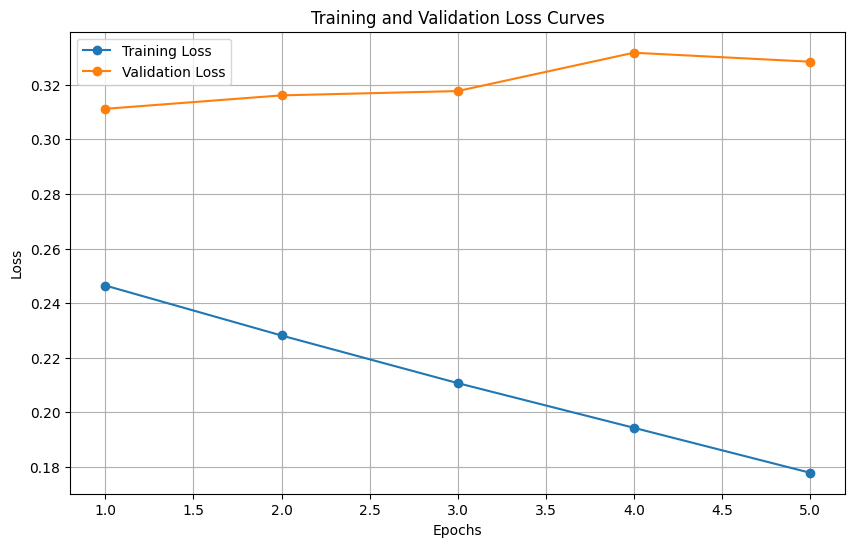

In [2]:
import matplotlib.pyplot as plt

# Initialize lists to store training and validation losses
train_losses = []
val_losses = []

# Training Loop
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{epochs}"):
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)
        
        # Forward pass
        outputs = model(**inputs)
        logits = outputs.logits  # Model outputs logits
        
        # Compute loss
        loss = criterion(logits, labels.float())  # BCEWithLogitsLoss expects float labels
        total_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch+1}/{epochs} - Avg Train Loss: {avg_train_loss:.4f}")
    
    # Validation Loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
            labels = batch['labels'].to(device)
            
            # Forward pass
            outputs = model(**inputs)
            logits = outputs.logits
            
            # Compute loss
            loss = criterion(logits, labels.float())
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1}/{epochs} - Avg Validation Loss: {avg_val_loss:.4f}")

# Plotting the Learning Curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

Using the approach to compute accuracy (i.e., all labels must match) in the tutorial, what is the test
accuracy? (0.5 points)

In [3]:
from sklearn.metrics import accuracy_score

# Function to compute accuracy for multi-label classification
def compute_accuracy(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
            labels = batch['labels'].to(device)
            
            # Forward pass
            outputs = model(**inputs)
            logits = outputs.logits
            
            # Get predictions by applying a threshold of 0.5
            preds = torch.sigmoid(logits)  # Apply sigmoid to get probabilities
            preds = (preds > 0.5).float()  # Convert probabilities to binary predictions (0 or 1)

            all_preds.append(preds)
            all_labels.append(labels)

    # Convert list of tensors to a single tensor
    all_preds = torch.cat(all_preds, dim=0)
    all_labels = torch.cat(all_labels, dim=0)

    # Compute accuracy (all labels must match)
    accuracy = (all_preds == all_labels).all(dim=1).float().mean()  # Compare all labels for each sample
    return accuracy.item()

# Calculate test accuracy
test_accuracy = compute_accuracy(model, test_loader, device)
print(f"Test Accuracy (all labels must match): {test_accuracy:.4f}")

/var/folders/2t/y8j6qkxj7hz7_q5nwn5zny0m0000gq/T/ipykernel_25532/3323046607.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Test Accuracy (all labels must match): 0.2607


Modify the accuracy such that a prediction is correct as long as one label matches. What is the test accuracy? (0.5 points)

In [4]:
def compute_accuracy_at_least_one(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
            labels = batch['labels'].to(device)
            
            # Forward pass
            outputs = model(**inputs)
            logits = outputs.logits
            
            # Get predictions by applying a threshold of 0.5
            preds = torch.sigmoid(logits)
            preds = (preds > 0.5).float()

            all_preds.append(preds)
            all_labels.append(labels)

    # Convert list of tensors to a single tensor
    all_preds = torch.cat(all_preds, dim=0)
    all_labels = torch.cat(all_labels, dim=0)

    # Compute accuracy (at least one label must match)
    accuracy = (all_preds == all_labels).any(dim=1).float().mean()  # Check if any label matches
    return accuracy.item()

# Calculate test accuracy where at least one label must match
test_accuracy_at_least_one = compute_accuracy_at_least_one(model, test_loader, device)
print(f"Test Accuracy (at least one label must match): {test_accuracy_at_least_one:.4f}")

/var/folders/2t/y8j6qkxj7hz7_q5nwn5zny0m0000gq/T/ipykernel_25532/3323046607.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Test Accuracy (at least one label must match): 1.0000
